### Assignment Four - Davis Club

Instructions:

Here is a dataset that shows a simple 2-node network: the attendance of 18 Southern Women at 14 social events:

Brief Description. Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms. Dataset. Python code to create dataset: https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html What can you infer about the relationships between (1) the women, and (2) the social events?

Please provide your code and analysis in an Jupyter notebook stored in your GitHub repository.

**Davis Southern Club Women**

The following code shows how to make unipartite projections of the graph and compute the properties of those graphs.

These data were collected by Davis et al. in the 1930s. They represent observed attendance at 14 social events by 18 Southern women. The graph is bipartite (clubs, women).

### Module 1 — Loading the Davis Southern Women Bipartite Network

#### What This Code Will Do
This block loads the Davis Southern Women dataset from NetworkX and extracts the two node sets:
- Women
- Social events

It also prints:
- Number of women
- Number of events
- Total number of attendance ties (edges)

#### Why This Matters
The dataset is a **bipartite (two-mode) network**, meaning:
- Women only connect to events
- Events only connect to women
- There are no direct woman-to-woman or event-to-event edges at this stage

Understanding the size and structure of the dataset provides context before performing projections or centrality analysis.

#### How to Interpret the Output
- 18 women = number of actors
- 14 events = number of social gatherings
- 89 edges = total attendance relationships

This confirms the dataset represents a moderately dense participation structure.

In [1]:
# Constructing the Bipartite Network

import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt

G = nx.davis_southern_women_graph()

women = G.graph["top"]
events = G.graph["bottom"]

print("Number of women:", len(women))
print("Number of events:", len(events))
print("Total edges (attendance ties):", G.number_of_edges())

Number of women: 18
Number of events: 14
Total edges (attendance ties): 89


### Module 2 — Constructing the Biadjacency Matrix

#### What This Code Will Do
This block converts the bipartite graph into a matrix form.

Rows represent women.
Columns represent events.
A value of 1 indicates that a woman attended that event.

#### Why This Matters
The biadjacency matrix is the mathematical representation of the bipartite graph.

It allows us to:
- See attendance patterns clearly
- Perform matrix-based operations
- Project the network into one-mode graphs

#### How to Interpret the Output
Each non-zero value represents a participation tie.

The total number of stored elements (89) matches the number of edges in the graph.

This matrix encodes the entire social participation structure.

In [2]:
# Create Biadjacency Matrix

B = bipartite.biadjacency_matrix(G, women, events)
print(B)

<Compressed Sparse Row sparse array of dtype 'int64'
	with 89 stored elements and shape (18, 14)>
  Coords	Values
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


### Module 3 — Women-Only Network (Unweighted Projection)

#### What This Code Will Do
This block projects the bipartite graph onto the women nodes.

Two women are connected if they attended at least one common event.

The degree printed for each woman represents:
The number of other women she shares at least one event with.

#### Why This Matters
Projection allows us to study relationships between women directly.

Instead of analyzing attendance, we analyze shared participation as a proxy for social interaction.

#### How to Interpret the Output
Higher degree = more social overlap.

Women with degree 17 are connected to nearly everyone.
Women with lower degrees (e.g., 11 or 12) are more peripheral.

This suggests:
- A highly cohesive core group
- Some variation in social participation
- Possible core-periphery structure

In [3]:
# Projecting the Network onto Women (Unweighted)

W = bipartite.projected_graph(G, women)

print("#Friends, Member")
for w in women:
    print(W.degree(w), w)

#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price


### Module 4 — Women-Only Network (Weighted Projection)

#### What This Code Will Do
This block creates a weighted projection of the women-only network.

Now, edges are weighted by the number of shared events.

The printed value is the weighted degree:
The total number of shared co-attendances with all other women.

#### Why This Matters
The unweighted projection only tells us if two women ever attended the same event.

The weighted projection tells us:
How often they attended events together.

This measures tie strength, not just connection.

#### How to Interpret the Output
Higher values indicate stronger social integration.

For example:
- A value of 57 suggests frequent repeated interaction.
- A value of 14 suggests limited overlap.

This helps identify:
- Core influencers
- Strongly bonded subgroups
- Peripheral participants

In [4]:
# Weighted Projection onto Women


### Module 5 — Visualizing the Bipartite Structure

#### What This Code Will Do
This block draws the bipartite network using a spring layout.

The layout positions nodes based on simulated physical forces:
- Connected nodes move closer together
- Less connected nodes drift outward

#### Why This Matters
Visualization helps us see:
- Clusters
- Central actors
- Peripheral actors
- Overall network cohesion

#### How to Interpret the Output
Look for:
- Dense clusters in the center → highly connected actors
- Nodes on the edges → less socially integrated individuals
- Overall density → indicates strong cohesion

The Davis dataset typically shows a dense central core.

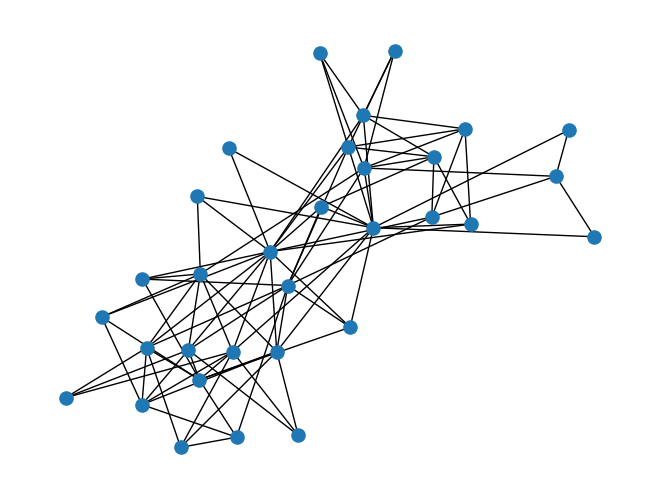

In [5]:
# Visualizing the Bipartite Network

pos = nx.spring_layout(G, seed=648)
nx.draw(G, pos, node_size=90)
plt.show()

### Module 6 — Event-Only Network Projection

#### What This Code Will Do
This block projects the bipartite graph onto the events.

Two events are connected if they share at least one attendee.

The degree printed represents:
The number of other events that share attendees.

#### Why This Matters
This allows us to understand:
- Which events are socially central
- Which events overlap heavily
- Whether events cluster into themes or subgroups

#### How to Interpret the Output
Higher degree events:
- Likely popular
- Serve as social hubs
- Connect multiple subgroups

Lower degree events:
- Possibly smaller or more exclusive gatherings

This reveals how social spaces overlap.

In [6]:
# Projecting onto Events

E = bipartite.projected_graph(G, events)

print("#Shared attendees, Event")
for e in events:
    print(E.degree(e), e)

#Shared attendees, Event
8 E1
8 E2
8 E3
8 E4
8 E5
13 E6
13 E7
13 E8
13 E9
8 E10
8 E11
8 E12
8 E13
8 E14


### Section 7 — Overall Structural Interpretation

#### Key Findings

1. The women’s network is highly connected.
2. Several women form a dominant core.
3. Weighted projection reveals stronger and weaker ties.
4. Events vary in popularity and overlap.
5. The network likely contains overlapping subgroups.

#### Sociological Insight

The Davis Southern Women dataset illustrates how:
- Social cohesion emerges from shared participation
- Centrality reflects prominence
- Repeated co-attendance strengthens social bonds
- Small datasets can reveal complex social structure

This dataset remains a foundational teaching example in social network analysis.